In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input


In [4]:
# Download the dataset
!wget -O airline-passengers.csv https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

# Load the dataset
df = pd.read_csv('airline-passengers.csv')

--2025-04-22 03:11:31--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/plain]
Saving to: ‘airline-passengers.csv’

airline-passengers. 100%[===================>]   2.13K  --.-KB/s    in 0s      

2025-04-22 03:11:31 (28.8 MB/s) - ‘airline-passengers.csv’ saved [2180/2180]



In [5]:
# Preprocess the data
df.columns = ['Date', 'Value']
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [6]:
# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Value']])

# Function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Create sequences
sequence_length = 30
X, y = create_sequences(scaled_data, sequence_length)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Build the LSTM model
model = Sequential([
    Input(shape=(X.shape[1], 1)),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(1)
])

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the model
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 30, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 279ms/step - loss: 0.1348 - val_loss: 0.2637
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0548 - val_loss: 0.0811
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0138 - val_loss: 0.0230
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0219 - val_loss: 0.0234
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0162 - val_loss: 0.0266
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0091 - val_loss: 0.0502
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0126 - val_loss: 0.0629
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0139 - val_loss: 0.0578
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0134 - val_loss: 0.0422
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0101 - val_loss: 0.0293
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0088 - val_loss: 0.0239
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0091 - val_loss: 0.0237


In [11]:
# Make predictions
predicted = model.predict(X)
predicted = scaler.inverse_transform(predicted)
actual = scaler.inverse_transform(y.reshape(-1, 1))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


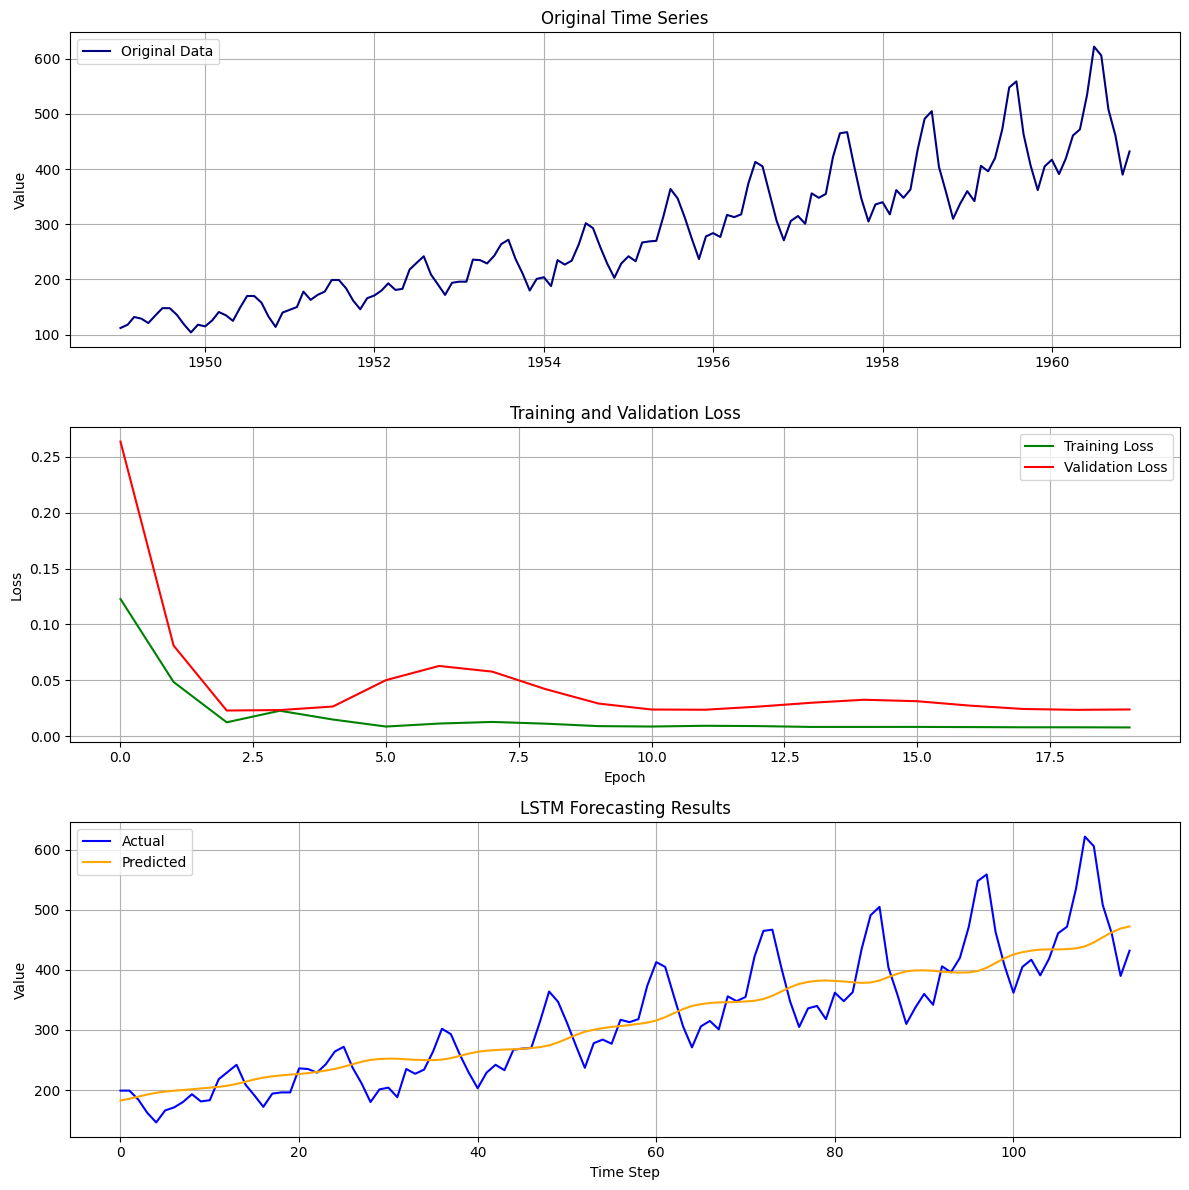

In [12]:
fig, axs = plt.subplots(3, 1, figsize=(12, 12))

axs[0].plot(df.index, df['Value'], label='Original Data', color='navy')
axs[0].set_title('Original Time Series')
axs[0].set_ylabel('Value')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(history.history['loss'], label='Training Loss', color='green')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].set_title('Training and Validation Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend()
axs[1].grid(True)

axs[2].plot(actual, label='Actual', color='blue')
axs[2].plot(predicted, label='Predicted', color='orange')
axs[2].set_title('LSTM Forecasting Results')
axs[2].set_xlabel('Time Step')
axs[2].set_ylabel('Value')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()